In [23]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import sem
from scipy.stats import ttest_ind
from itertools import combinations
import seaborn as sns
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

In [3]:
phase3_collection = unpickle_this('phase3collection.pkl')

All set to analyze


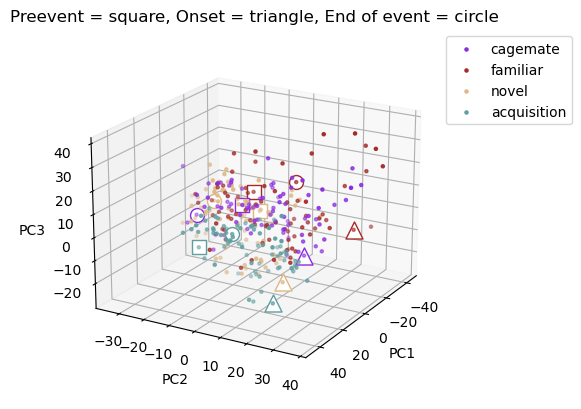

array([0.16921279, 0.105054  , 0.07909685])

In [6]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, timebin = 100, ignore_freq=0.5)
pca_df, coeff, var = pca_analysis.PCA_trajectories(4,4, events = ['cagemate', 'familiar', 'novel', 'acquisition'], d = 3)
#geo_dis = pca_analysis.LOO_PCA(2,2,0.9, events = ['acquisition', 'familiar', 'novel', 'cagemate'])
var[0:3]

20230809_103121_1_merged.rec 1.1


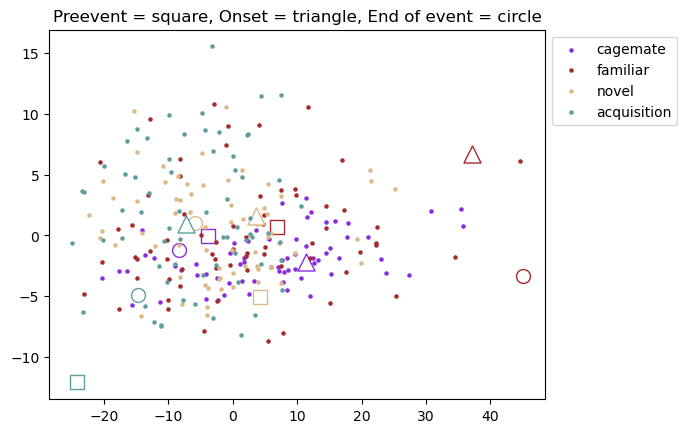

[0.72240568 0.08685929 0.0628185 ]
20230809_143303_1_merged.rec 1.4


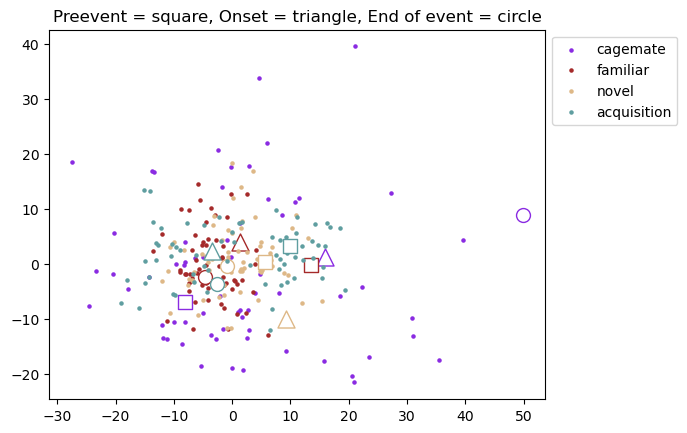

[0.33118359 0.21296409 0.10065481]
20230810_101534_1_merged.rec 1.1


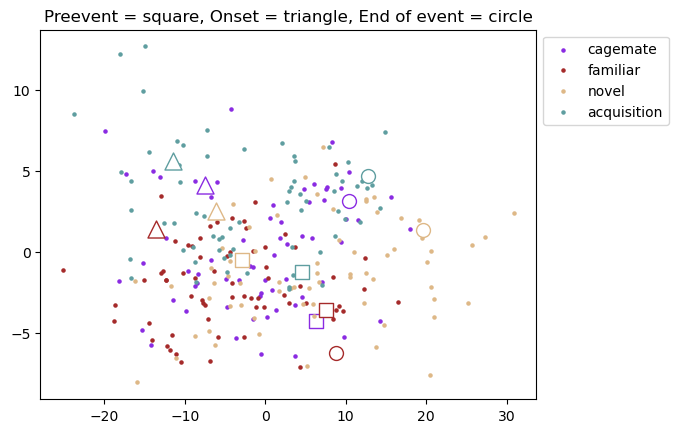

[0.72945661 0.09536677 0.06275785]
20230810_120856_1_merged.rec 1.2


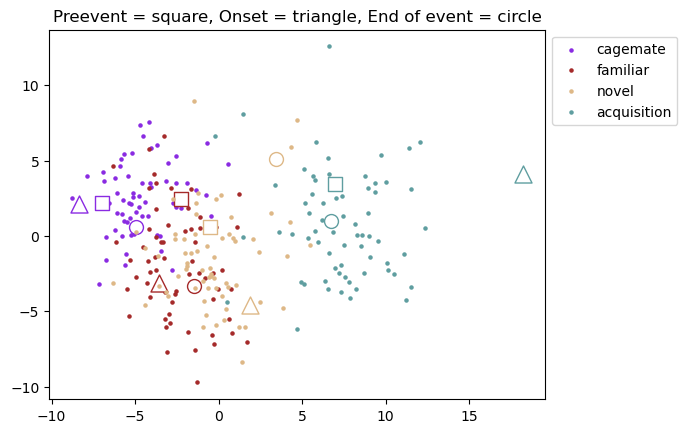

[0.25240552 0.12402597 0.09964239]
20230810_140909_1_merged.rec 1.4


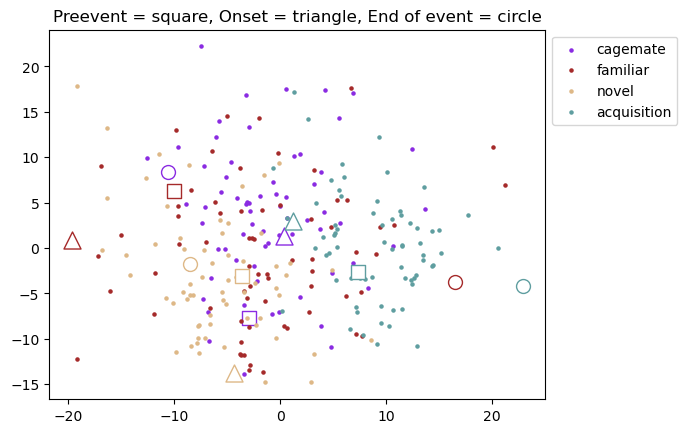

[0.32756544 0.25530949 0.0903427 ]
20230811_101635_1_merged.rec 1.1


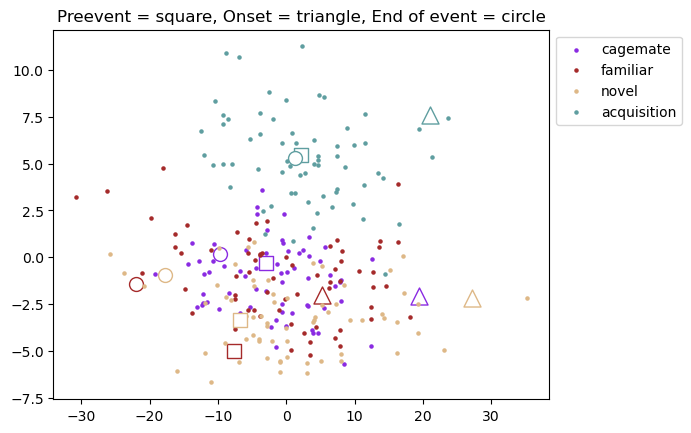

[0.74777856 0.11176886 0.06038631]
20230811_120331_merged.rec 1.2


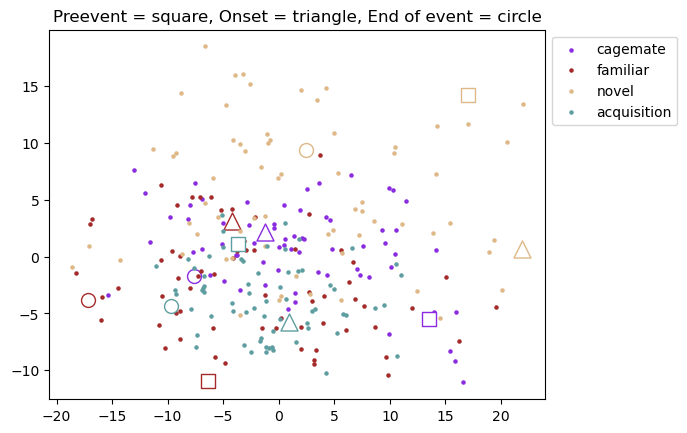

[0.31437229 0.155519   0.11725498]
20230811_154219_1_merged.rec 1.4


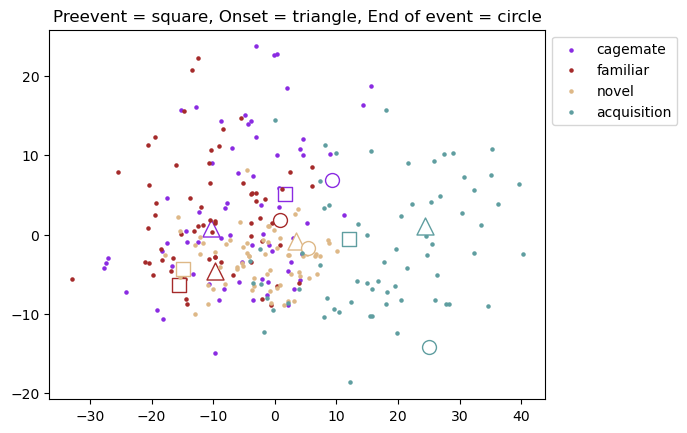

[0.52923855 0.15118403 0.09117477]


In [7]:
for recording in pca_analysis.ephyscollection.collection.keys():
    print(recording, pca_analysis.ephyscollection.get_by_name(recording).subject)
    pca_df, coeff, var = pca_analysis.PCA_trajectories(3,4, events = ['cagemate', 'familiar', 'novel', 'acquisition'], recordings=[recording])
    print(var[0:3])

All set to analyze
[0.16395999 0.1031991  0.0773657 ]
0.16395999241194786
0.26715909040909774
0.34452478746685344
0.41084396630608594
0.46299821840996597
0.5085156046156233
0.5460226012764583
0.5816305038055519
0.6112216810451886
0.6402675216355167


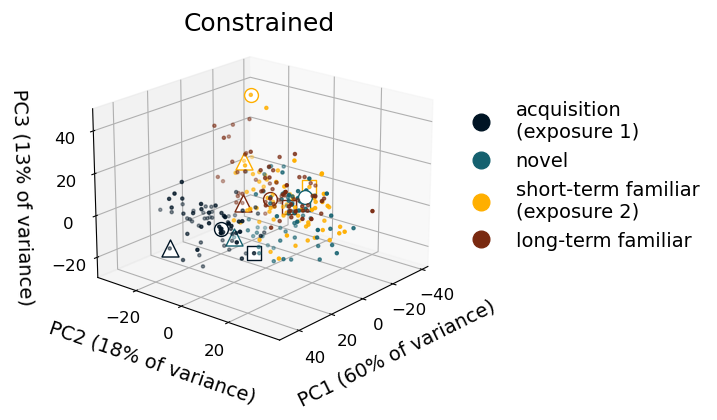

In [19]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, timebin = 100, ignore_freq = 0.5)

pca_df, coeff, var = pca_analysis.PCA_trajectories(3,
                                                   4,
                                                   events = ['cagemate', 'familiar', 'novel', 'acquisition'],
                                                   d = 3,
                                                   plot = False)


PCA_matrix = pca_df
print(var[0:3])
total_var = 0
for variance in var[0:10]:
    total_var=+ total_var + variance
    print(total_var)
PCA_key = ['cagemate', 'familiar', 'novel', 'acquisition']
equalize = 3
pre_window = 4
post_window = 0
azim=45
elev=20
timebin = 100
color_id_dict = {'acquisition\n(exposure 1)': hex_2_rgb('#001424'), 'novel': hex_2_rgb('#15616F'), 
                'short-term familiar\n(exposure 2)': (1.0, 0.6862745098039216, 0.0), 'long-term familiar': hex_2_rgb('#792910')}

event_lengths = int(
            (equalize + pre_window + post_window) * 1000 / timebin
        )
event_end = int((equalize + pre_window) * 1000 / timebin)
pre_window = pre_window * 1000 / timebin
post_window = post_window * 1000 / timebin
colors = [hex_2_rgb('#792910'),  (1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F'), hex_2_rgb('#001424')]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
counter = 0 
for i in range(0, len(PCA_key)*event_lengths, event_lengths):
    event_label = PCA_key[counter]
    onset = int(i + pre_window - 1)
    end = int(i + event_end - 1)
    post = int(i + event_lengths - 1)
    ax.scatter(
        PCA_matrix[i : i + event_lengths, 0],
        PCA_matrix[i : i + event_lengths, 1],
        PCA_matrix[i : i + event_lengths, 2],
        label=event_label,
        s=5,
        color=colors[counter],
    )
    ax.scatter(
        PCA_matrix[i, 0],
        PCA_matrix[i, 1],
        PCA_matrix[i, 2],
        marker="s",
        s=100,
        color="w",
        edgecolors=colors[counter],
    )
    ax.scatter(
        PCA_matrix[onset, 0],
        PCA_matrix[onset, 1],
        PCA_matrix[onset, 2],
        marker="^",
        s=150,
        color="w",
        edgecolors=colors[counter],
    )
    ax.scatter(
        PCA_matrix[end, 0],
        PCA_matrix[end, 1],
        PCA_matrix[end, 2],
        marker="o",
        s=100,
        color="w",
        edgecolors=colors[counter],
    )
    counter += 1
id_labels = [plt.Line2D([0], [0], marker = 'o', color=color_id_dict[label], lw=0, label=label) for label in color_id_dict]
legend_labels = id_labels
ax.legend(loc="upper left", bbox_to_anchor=(1, .80), frameon = False, fontsize = 14, markerscale = 2, handles = legend_labels)
ax.set_xlabel("\nPC1 (60% of variance)", fontsize = 14)
ax.set_ylabel("\nPC2 (18% of variance)", fontsize = 14)
ax.set_zlabel("\nPC3 (13% of variance)", fontsize = 14)
# ax.set_xlim(-10, 20)
# ax.set_ylim(-10, 15)
# ax.set_zlim(-10, 15)
ax.tick_params(labelsize = 12)
ax.view_init(azim = 40, elev = 20
    )
plt.title('Constrained', fontsize = 18, y = 1, x = .5)
plt.show()
#array([0.60033192, 0.1838055 , 0.12575177])

In [ ]:
recording = '20230810_120856_1_merged.rec'
pca_df, coeff, var = pca_analysis.PCA_trajectories(2,2, events = ['cagemate', 'familiar', 'novel', 'acquisition'], recordings=[recording], plot = False)

PCA_matrix = pca_df
PCA_key = ['cagemate', 'familiar', 'novel', 'acquisition']
equalize = 2
pre_window =2
post_window = 0
azim=45
elev=20
timebin = 50


event_lengths = int(
            (equalize + pre_window + post_window) * 1000 / timebin
        )
event_end = int((equalize + pre_window) * 1000 / timebin)
pre_window = pre_window * 1000 / timebin
post_window = post_window * 1000 / timebin
colors = [hex_2_rgb('#792910'),  (1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F'), hex_2_rgb('#001424')]
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot()
counter = 0 
for i in range(0, len(PCA_key)*event_lengths, event_lengths):
    event_label = PCA_key[counter]
    onset = int(i + pre_window - 1)
    end = int(i + event_end - 1)
    post = int(i + event_lengths - 1)
    ax.scatter(
        PCA_matrix[i : i + event_lengths, 0],
        PCA_matrix[i : i + event_lengths, 1],
        label=event_label,
        s=10,
        color=colors[counter],
    )
    ax.scatter(
        PCA_matrix[i, 0],
        PCA_matrix[i, 1],
        marker="s",
        s=150,
        color="w",
        edgecolors=colors[counter],
    )
    ax.scatter(
        PCA_matrix[onset, 0],
        PCA_matrix[onset, 1],
        marker="^",
        s=200,
        color="w",
        edgecolors=colors[counter],
    )
    ax.scatter(
        PCA_matrix[end, 0],
        PCA_matrix[end, 1],
        marker="o",
        s=150,
        color="w",
        edgecolors=colors[counter],
    )
    counter += 1
#ax.legend(loc="upper left", bbox_to_anchor=(1, .70), frameon = False, fontsize = 14, markerscale = 2)
ax.set_xlabel("PC1 (71% of variance)", fontsize = 22)
ax.set_ylabel("PC2 (18% of variance)", fontsize = 22)
ax.tick_params(labelsize = 18)
plt.title('    Constrained example sessions', fontsize = 28, y = 1.1, x = .5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(3)
plt.gca().spines['left'].set_linewidth(3)
plt.show()

In [ ]:
recording = '20230811_154219_1_merged.rec'
pca_df, coeff, var = pca_analysis.PCA_trajectories(2,2, events = ['cagemate', 'familiar', 'novel', 'acquisition'], recordings=[recording], plot = False)

PCA_matrix = pca_df
PCA_key = ['cagemate', 'familiar', 'novel', 'acquisition']
equalize = 2
pre_window =2
post_window = 0
azim=45
elev=20
timebin = 50


event_lengths = int(
            (equalize + pre_window + post_window) * 1000 / timebin
        )
event_end = int((equalize + pre_window) * 1000 / timebin)
pre_window = pre_window * 1000 / timebin
post_window = post_window * 1000 / timebin
colors = [hex_2_rgb('#792910'),  (1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F'), hex_2_rgb('#001424')]
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot()
counter = 0 
for i in range(0, len(PCA_key)*event_lengths, event_lengths):
    event_label = PCA_key[counter]
    onset = int(i + pre_window - 1)
    end = int(i + event_end - 1)
    post = int(i + event_lengths - 1)
    ax.scatter(
        PCA_matrix[i : i + event_lengths, 0],
        PCA_matrix[i : i + event_lengths, 1],
        label=event_label,
        s=10,
        color=colors[counter],
    )
    ax.scatter(
        PCA_matrix[i, 0],
        PCA_matrix[i, 1],
        marker="s",
        s=150,
        color="w",
        edgecolors=colors[counter],
    )
    ax.scatter(
        PCA_matrix[onset, 0],
        PCA_matrix[onset, 1],
        marker="^",
        s=200,
        color="w",
        edgecolors=colors[counter],
    )
    ax.scatter(
        PCA_matrix[end, 0],
        PCA_matrix[end, 1],
        marker="o",
        s=150,
        color="w",
        edgecolors=colors[counter],
    )
    counter += 1
#ax.legend(loc="upper left", bbox_to_anchor=(1, .70), frameon = False, fontsize = 14, markerscale = 2)
ax.set_xlabel("PC1 (89% of variance)", fontsize = 20)
ax.set_ylabel("PC2 (6% of variance)", fontsize = 20)
ax.tick_params(labelsize = 18)
plt.title('    Constrained example session', fontsize = 24, y = 1.1, x = .5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(3)
plt.gca().spines['left'].set_linewidth(3)
 
plt.show()

In [20]:
avg_geo_dist = pca_analysis.avg_geo_dist(3,4,0.9, events = ['acquisition', 'familiar', 'novel', 'cagemate'])
avg_geo_dist
avg_geo_dis_df = pd.DataFrame.from_dict(avg_geo_dist)
avg_geo_dis_df

acquisition                               cagemate               \
      cagemate     familiar        novel     familiar        novel   
0  1293.939268  1154.267292  1154.808249  1409.956063  1325.220037   
1  1172.352821  1334.884412  2121.992641   996.204826  1856.261161   
2   813.937110  1015.683156   656.818853  1071.876137   740.783126   
3  1096.870870  1041.166430  1146.175522   853.382534   810.837674   
4  1496.600716  1473.543331  1320.125967  1315.668324  1321.876562   
5   920.587740   985.810100   831.609868   715.486472   708.027244   
6  1208.520482  1423.618835  1057.322018  1620.864662  1276.917875   
7  2358.046147  1815.210279  2164.093052  1244.374977  1495.344568   

      familiar  
         novel  
0  1226.729354  
1  1804.797603  
2   890.154718  
3   889.190563  
4  1157.248486  
5   747.932123  
6  1454.902887  
7  1215.020160

In [21]:
avg_values = avg_geo_dis_df.mean()
avg_values

acquisition  cagemate    1295.106894
             familiar    1280.522979
             novel       1306.618271
cagemate     familiar    1153.476749
             novel       1191.908531
familiar     novel       1173.246987
dtype: float64

In [ ]:

plt.figure(figsize=(4,3))
col_pal = sns.dark_palette("#5Bc", reverse=True, as_cmap=True)
heatmap = sns.heatmap(data, cmap=col_pal, annot=True, fmt = '.2f', vmin= 500)  # 'd' for integer format
heatmap.set_xticklabels(['Long-term', 'Short-term', 'Novel', 'Acquisition'], fontsize = 12, rotation = 45)
heatmap.set_yticklabels(['Long-term', 'Short-term', 'Novel', 'Acquisition'], fontsize = 12, rotation = 0)
heatmap.xaxis.set_ticks_position('top')
plt.title('Geodesic Distances with 3 PCs (90% of variance)', fontsize = 16)

plt.show()

In [24]:
p_values = pd.DataFrame(index=avg_geo_dis_df.columns, columns=avg_geo_dis_df.columns)
for group1 in avg_geo_dis_df.columns:
    for group2 in avg_geo_dis_df.columns:
        if group1 != group2:
            t_stat, p_value = ttest_ind(avg_geo_dis_df[group1], avg_geo_dis_df[group2])
            p_values.at[group1, group2] = p_value
p_values

acquisition                      cagemate            \
                        cagemate  familiar     novel  familiar     novel   
acquisition cagemate         NaN  0.942135  0.965208  0.490111  0.649321   
            familiar    0.942135       NaN  0.907697  0.401781  0.622483   
            novel       0.965208  0.907697       NaN  0.503946  0.644683   
cagemate    familiar    0.490111  0.401781  0.503946       NaN  0.832911   
            novel       0.649321  0.622483  0.644683  0.832911       NaN   
familiar    novel       0.567771  0.508767  0.572585  0.904187  0.922409   

                      familiar  
                         novel  
acquisition cagemate  0.567771  
            familiar  0.508767  
            novel     0.572585  
cagemate    familiar  0.904187  
            novel     0.922409  
familiar    novel          NaN

All set to analyze


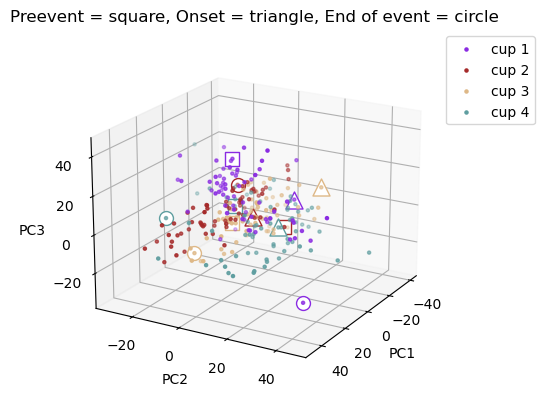

array([0.12651184, 0.0899494 , 0.07756806])

In [29]:
location_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, timebin = 100, ignore_freq = 0.5)
pca_df, coeff, var = location_analysis.PCA_trajectories(3,4, events = ['cup 1', 'cup 2', 'cup 3', 'cup 4'], d = 3)
#geo_dis = location_analysis.LOO_PCA(2,2,0.9, events = ['cup 1', 'cup 2', 'cup 3', 'cup 4'])
var[0:3]

All set to analyze


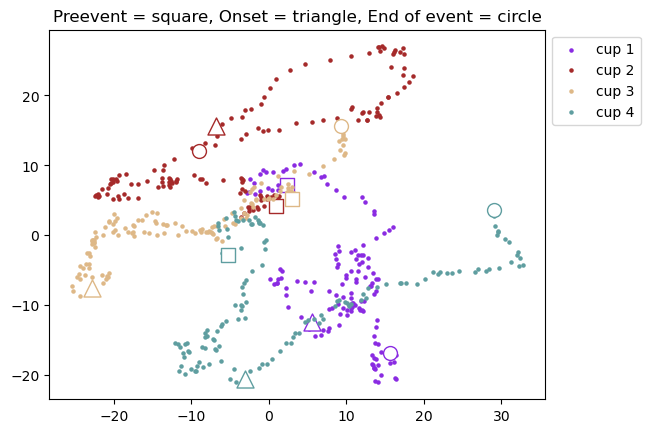

In [34]:
location_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, timebin = 50, ignore_freq = 0.5, smoothing_window = 1000)
pca_df, coeff, var = location_analysis.PCA_trajectories(3,4, events = ['cup 1', 'cup 2', 'cup 3', 'cup 4'])
